In [80]:
from openpiv.pyprocess import extended_search_area_piv as piv, vectorized_sig2noise_ratio

import numpy as np
from test_process import create_pair, shift_u, shift_v, threshold

frame_a, frame_b = create_pair(image_size=64,u=5,v=1)

def test_validation_peak2mean():
    """test of the simplest PIV run
    default window_size = 32
    """
    u, v, s2n = piv(frame_a, frame_b, 
                    window_size=(32,32), 
                    sig2noise_method="peak2mean")
    assert np.max(np.abs(s2n - 3)) < 0.5

def test_validation_peak2peak():
    """test of the simplest PIV run
    default window_size = 32
    """
    u, v, s2n = piv(frame_a, frame_b, 
                    window_size=(32,32), 
                    sig2noise_method="peak2peak", 
                    use_vectorized=False)

    # sometimes s2n can get zeros cause the synthetic images 
    # have only 1 peak and the second turns out to be on the border
    assert np.sum(np.nonzero(s2n)) > 2 # at least 2 non-zeros
    assert np.max(np.abs(s2n[np.nonzero(s2n)] - 2.5)) < 0.5

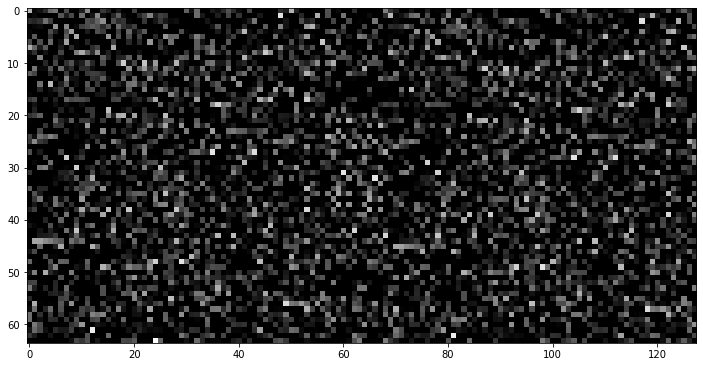

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(np.c_[frame_a, frame_b],cmap='gray')

In [82]:
test_validation_peak2mean()

peak2mean


In [83]:
test_validation_peak2peak()